In [1]:

import numpy as np
import random as rmd
import matplotlib.pyplot as plt
import csv, time, itertools


In [2]:

# LOAD DATA
data = []

with open('european_cities.csv', 'r') as infile:
    reader = csv.reader(infile,delimiter=';')
    for row in reader:
        data.append(row)

names = np.array(data[0])
cities = np.array(data[1:]).astype(np.float32)


In [3]:

# Calculating length of route
def fitness(route, start):
    length = 0
    prev = start

    for curr in route:
        length += cities[prev][curr]	#adding lengths of cities from route
        prev = curr

    length += cities[prev][start]	#adding finish of route with start city
    return length



In [13]:


# Exhastive search
def exhaustive(n):
    route = np.arange(1,n)
    start_city = 0
    per = list(itertools.permutations(route))
    per = per[:int(len(per)/2)]		# removing half of the permutation because its just the same stacked the other way around
    best = 1e9

    for i in range(len(per)):
        length = fitness(per[i], start_city)
        if length < best:		#saving shortest length and best route
            best = length 		
            best_route = list(per[i])

    best_route = [start_city] + best_route + [start_city]
    return best, best_route



In [5]:


# Hill search (If I remember correct, it just searches for the next shortest step)
def hill(n, rnd, start = 0.5):
    route = rmd.sample(range(0, len(names)), n)		#taking random cities to use
    rmd.shuffle(route)
    start_city = route[0]
    route = route[1:]	# removing start city so it dont get swapped around

    if start != 0.5:	# making a new start city if it is choosen, so it can be compared to exhaustive
        route = np.arange(1,n)
        rmd.shuffle(route)
        start_city = start

    for i in range(rnd):
        length = fitness(route, start_city)		#getting length of route
        swap1, swap2 = rmd.sample(list(enumerate(route)), 2)
        new_route = np.copy(route)
        new_route[swap1[0]], new_route[swap2[0]] = new_route[swap2[0]], new_route[swap1[0]]		#swapping position
        new_length = fitness(new_route, start_city)		#testing new route, then keeping it if better
        if new_length < length:
            length = new_length
            route = new_route
    best_route = [start_city] + list(route) + [start_city]
    return length, best_route


In [21]:


# My version of a Genetic Algorithm
def GA(n, rnd, pop, start=0.5):
    route = rmd.sample(range(0, len(names)), n)		#same as in hill climber
    rmd.shuffle(route)
    start_city = route[0]
    route = route[1:]

    if start != 0.5:
        route = np.arange(1,n)
        start_city = start

    population = {}		#saving in dictionary, to with key as length

    for i in range(pop):
        new_route = np.copy(route)
        rmd.shuffle(new_route)
        dic_name = fitness(new_route, start_city)
        population[dic_name] = new_route

    best_of_gen = []

    for r in range(rnd):
        best = sorted(population);
        if pop > 40:	# if population is more than 40, keeping just the 1/4 of the best, 
                        # to add more of the random routes hoping it will prevent local maximum
            if pop%2==0 and len(population) > 8:
                best = best[:int(len(best)/4 - 1)]
            if pop%2 != 0 and len(population) > 4:
                best = best[:int(len(best)/4)]
            else:
                best = best
            new_pop = 0		# just code for keeping the best, and adding some random routes
            new_pop_route = [population.pop(i) for i in best]	
            new_pop = dict( zip(best, new_pop_route)) 

            for i in range(int(len(population)/2)):
                random_route_pick = population.popitem()
                new_pop.update({random_route_pick[0]: random_route_pick[1] })

        else:
            if pop%2==0:	# for population < 40 it will only keep one random individual,
                            # of the ones not having best lenght. This might make it ending up
                            # with a local maximum easier, than with keeping more of the "worst"
                            # routes
                best = best[:int(len(best)/2 - 1)]
            else:
                best = best[:int(len(best)/2)]
            new_pop = 0
            new_pop_route = [population.pop(i) for i in best];	random_route_pick = population.popitem()
            new_pop = dict( zip(best, new_pop_route)); new_pop.update({random_route_pick[0]: random_route_pick[1] })

        for i in range(len(new_pop)):	# making mutations of kept routes, and checking routes
            # print(list((new_pop.values()))[0])
            alien_mutation = np.copy(list(new_pop.values())[i])
            swap1, swap2 = rmd.sample(list(enumerate(alien_mutation)), 2)
            alien_mutation[swap1[0]], alien_mutation[swap2[0]] = alien_mutation[swap2[0]], alien_mutation[swap1[0]]
            new_length = fitness(alien_mutation, start_city)
            new_pop.update({new_length : alien_mutation})

        best_new = sorted(new_pop);	best_new = best_new[:pop]; best_of_gen.append(best_new[0])
        best_new_routes = [new_pop.pop(i) for i in best_new]
        population = 0
        population = dict( zip(best_new, best_new_routes))	#adding length of population back to dictionary,
        # but since its dictionary, the ones with same length will not be kept twice, so this algorithm will converge

    best_length = sorted(population)[0]
    best_route = [start_city] + list(population.pop(best_length)) + [start_city]
    return best_length, best_route, best_of_gen



In [14]:

# Just a function to run the algo exhaustive and print out results
def exhaustive_run(ncities):

    for i in ncities:
        start_time = time.time()
        length, route = exhaustive(i)
        time_taken = time.time() - start_time
        n_cities = i
        print("\n --------- Running exhaustive with {} cities ---------".format(i))
        print("\n 		Length : {}".format(length))
        print("		Route :\n{}\n".format([names[i] for i in route]))
        print("--------- {} seconds ---------\n".format(time_taken))

exhaustive_run(ncities = range(6,11))




 --------- Running exhaustive with 6 cities ---------

 		Length : 5018.810028076172
		Route :
['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels', 'Barcelona']

--------- 0.0004975795745849609 seconds ---------


 --------- Running exhaustive with 7 cities ---------

 		Length : 5487.8900146484375
		Route :
['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Barcelona']

--------- 0.004959821701049805 seconds ---------


 --------- Running exhaustive with 8 cities ---------

 		Length : 6667.490051269531
		Route :
['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Brussels', 'Dublin', 'Barcelona']

--------- 0.027776479721069336 seconds ---------


 --------- Running exhaustive with 9 cities ---------

 		Length : 6678.550079345703
		Route :
['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona']

--------- 0.19542193412780762 seconds -----

In [16]:


# Just a function to run the algo hill and print out results
def hill_run(ncities, runs, ngen, plot = False):

    for i in ncities:
        length_list = []
        tours = []
        avg_time = []
        ncit = i

        for j in range(runs):

            start_time = time.time()	
            length, route = hill(i, ngen, start=0)
            avg_time.append(time.time() - start_time)
            length_list.append(length)
            tours.append([names[k] for k in route])

        if plot == True:
            plt.plot(length_list)
            plt.show()

        shortest_travel = length_list.index(min(length_list))
        longest_travel = length_list.index(max(length_list))
        print("\n ---------Running hill climber with {} generations, {} cities and {} runs---------".format(ngen, ncit,runs))
        print("\n 		Shortest travel length : {}\nRoute : {}\n \n \n\
        Longest travel length : {}\nRoute : {}\n \n \n 		Average travel length : {}\n 		Standard deviation : {}\n\
        Average time of algorithm : {} seconds\n".format(\
        length_list[shortest_travel], tours[shortest_travel], length_list[longest_travel], \
            tours[longest_travel], np.average(length_list), np.std(length_list), np.average(avg_time)))


        
        

# ncitis = nr of cities to travle, runs = runs of algorithm
# ngen= nr of generations, plot = True if you want plots
hill_run(ncities = [10,24], runs = 20, ngen = 20000)





 ---------Running hill climber with 20000 generations, 10 cities and 20 runs---------

 		Shortest travel length : 7486.31005859375
Route : ['Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona']
 
 
        Longest travel length : 9467.889862060547
Route : ['Barcelona', 'Istanbul', 'Bucharest', 'Brussels', 'Dublin', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Barcelona']
 
 
 		Average travel length : 7865.35803527832
 		Standard deviation : 499.5101380688062
        Average time of algorithm : 0.9242449164390564 seconds


 ---------Running hill climber with 20000 generations, 24 cities and 20 runs---------

 		Shortest travel length : 12834.619979858398
Route : ['Barcelona', 'Rome', 'Sofia', 'Istanbul', 'Bucharest', 'Belgrade', 'Budapest', 'Vienna', 'Milan', 'Munich', 'Prague', 'Berlin', 'Warsaw', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Copenhagen', 'Hamburg', 'Brussels', 'Paris'


 ---------GA with 1000 generations, 30 population, 10 cities and 20 runs---------

 		Shortest distance : 7486.31005859375
 		Longest distance : 8312.7900390625
 		Average distance :         7762.626528930664
 		Standard deviation : 370.93687648817127
Average running time : 0.08082457780838012 seconds


 ---------GA with 1000 generations, 100 population, 10 cities and 20 runs---------

 		Shortest distance : 7486.31005859375
 		Longest distance : 7486.31005859375
		Average distance :         7486.31005859375
 		Standard deviation : 0.0
Average running time : 1.7535809397697448 seconds


 ---------GA with 1000 generations, 200 population, 10 cities and 20 runs---------

 		Shortest distance : 7486.31005859375
 		Longest distance : 7486.31005859375
 		Average distance :         7486.31005859375
 		Standard deviation : 0.0
Average running time : 4.45747184753418 seconds



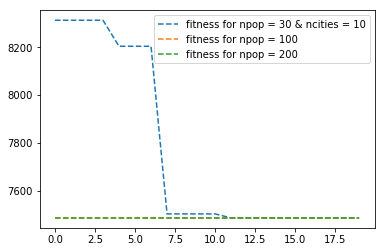

In [ ]:



# messy function to run GA with different values

def GA_run(ncities, runs, ngen, pop, plot = False): 

    for i in ncities:

        length_list_2 = []
        ncit = i
        time_taken_list_2 = []

        for m in range(len(pop)):

            length_list = []
            time_taken_list = []

            for j in range(runs):
                start_time = time.time()
                length, route, best_gen = GA(i, ngen, pop[m], start=0)
                time_taken = time.time() - start_time
                b_route = [names[k] for k in route]
                length_list.append(length)
                time_taken_list.append(time_taken)

            length_list_2.append(length_list)
            time_taken_list_2.append(time_taken_list)

        length_list_2 = [sorted(length_list_2[g], reverse = True) for g in range(len(length_list_2))]

        print("\n ---------GA with {} generations, {} population, {} cities and {} runs---------".format(\
                                                                                ngen, pop[0], ncit, runs))
        print("\n 		Shortest distance : {}\n 		Longest distance : {}\n 		Average distance : \
        {}\n 		Standard deviation : {}\nAverage running time : {} seconds\n"\
        .format(min(length_list_2[0]), max(length_list_2[0]), np.average(length_list_2[0]), np.std(length_list_2[0]),\
        np.average(time_taken_list_2[0])))

        print("\n ---------GA with {} generations, {} population, {} cities and {} runs---------".format(\
                                                                                ngen, pop[1], ncit, runs))
        print("\n 		Shortest distance : {}\n 		Longest distance : {}\n		Average distance : \
        {}\n 		Standard deviation : {}\nAverage running time : {} seconds\n"\
        .format(min(length_list_2[1]), max(length_list_2[1]), np.average(length_list_2[1]), np.std(length_list_2[1]),\
        np.average(time_taken_list_2[1])))

        print("\n ---------GA with {} generations, {} population, {} cities and {} runs---------".format(\
                                                                                ngen, pop[2], ncit, runs))
        print("\n 		Shortest distance : {}\n 		Longest distance : {}\n 		Average distance : \
        {}\n 		Standard deviation : {}\nAverage running time : {} seconds\n"\
        .format(min(length_list_2[2]), max(length_list_2[2]), np.average(length_list_2[2]), np.std(length_list_2[2]),\
        np.average(time_taken_list_2[2])))

        if plot == True:
            line1, = plt.plot(length_list_2[0], label = "fitness for npop = {} & ncities = {}".format(pop[0], ncit)\
                              , linestyle= '--')
            line2, = plt.plot(length_list_2[1], label = "fitness for npop = {}".format(pop[1]), linestyle= '--')
            line3, = plt.plot(length_list_2[2], label = "fitness for npop = {}".format(pop[2]), linestyle= '--')
            plt.legend(loc='upper right')
            plt.show()


            
            
# ncitis = nr of cities to travle, runs = runs of algorithm
# ngen= nr of generations for population, pop = population 
# plot = True if you want plots
GA_run(ncities = [10, 24], runs = 20, ngen = 1000, pop = [30, 100, 200], plot = True)

